<h1><b>Spotify Data Analysis</b></h1>
<b>Project Story</b>

Music has always been more than just entertainment — it’s emotion, culture, and data.
Platforms like Spotify have revolutionized how we discover and consume music, providing vast amounts of data about artists, songs, and listener behavior.

For this project, I wanted to explore what makes a song trend on Spotify.
Is it the artist’s popularity? The energy of the track? Or does danceability and tempo play a bigger role?

By analyzing trending Spotify data, this project dives deep into audio features, artist trends, and popularity metrics to uncover the patterns behind viral music.

<b>Project Overview</b>

This project is part of my 15-Day Data & Business Analysis Challenge (Day 6).
The dataset includes Spotify’s audio features such as danceability, energy, tempo, valence, loudness, and popularity.

Using Python and EDA techniques, I analyzed which features contribute most to a track’s popularity, visualized genre patterns, and identified top-performing artists over time.

<h3><b>Setting Up Enviroment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading dataset

df= pd.read_csv('spotifydataset.csv')

df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


In [2]:
#Check the structure and missing values:

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12068 entries, 0 to 12067
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        12068 non-null  int64  
 1   track_id          12068 non-null  object 
 2   artists           12067 non-null  object 
 3   album_name        12067 non-null  object 
 4   track_name        12067 non-null  object 
 5   popularity        12067 non-null  float64
 6   duration_ms       12067 non-null  float64
 7   explicit          12067 non-null  object 
 8   danceability      12067 non-null  float64
 9   energy            12067 non-null  float64
 10  key               12067 non-null  float64
 11  loudness          12067 non-null  float64
 12  mode              12067 non-null  float64
 13  speechiness       12067 non-null  float64
 14  acousticness      12067 non-null  float64
 15  instrumentalness  12067 non-null  float64
 16  liveness          12067 non-null  float6

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,1
duration_ms,1
explicit,1
danceability,1
energy,1


In [6]:
#Handling Missing Values
df['artists'] = df['artists'].fillna('Unknown Artist')
df['album_name'] = df['album_name'].fillna('Unknown album')
df['track_name'] = df['track_name'].fillna('Unknown track')
df['popularity'] = df['popularity'].fillna(df['popularity'].mean())
df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].mean())
df['explicit'] = df['explicit'].fillna(df['explicit'].mode()[0])
df['danceability'] = df['danceability'].fillna(df['danceability'].mean())
df['energy'] = df['energy'].fillna(df['energy'].mean())
df['key'] = df['key'].fillna(df['key'].mode()[0])
df['loudness'] = df['loudness'].fillna(df['loudness'].mean())
df['mode'] = df['mode'].fillna(df['mode'].mode()[0])
df['speechiness'] = df['speechiness'].fillna(df['speechiness'].mean())
df['acousticness'] = df['acousticness'].fillna(df['acousticness'].mean())
df['instrumentalness'] = df['instrumentalness'].fillna(df['instrumentalness'].mean())
df['liveness'] = df['liveness'].fillna(df['liveness'].mean())
df['valence'] = df['valence'].fillna(df['valence'].mean())
df['tempo'] = df['tempo'].fillna(df['tempo'].mean())
df['time_signature'] = df['time_signature'].fillna(df['time_signature'].mode()[0])
df['track_genre'] = df['track_genre'].fillna(df['track_genre'].mode()[0])


#Convert duration from milliseconds to minutes for better interpretation
df['duration_min'] = df['duration_ms'] / 60000

display(df.isnull().sum())

/tmp/ipython-input-322429980.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['explicit'] = df['explicit'].fillna(df['explicit'].mode()[0])


,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


In [30]:
#dropping not important columns
df.drop(['Unnamed: 0', 'track_id'], axis=1, errors='ignore', inplace=True)


#Convert duration from milliseconds to minutes for better interpretation
df['duration_min'] = df['duration_ms'] / 60000

<h3><b>Descriptive Analysis</b></h3>

Get a quick understanding of the dataset.

In [9]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,12068.000000,1.206800e+04,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000
mean,33.869396,2.448109e+05,0.527611,0.623281,5.389625,-8.774585,0.650315,0.066939,0.328651,0.210549,0.202287,0.462595,122.131336,3.892360,4.080181
std,21.933196,1.275059e+05,0.173016,0.266947,3.548104,5.311858,0.476890,0.065722,0.344037,0.344585,0.177262,0.269839,29.795821,0.423982,2.125099
min,0.000000,2.226600e+04,0.000000,0.001440,0.000000,-41.808000,0.000000,0.000000,0.000000,0.000000,0.011600,0.000000,0.000000,0.000000,0.371100
25%,17.000000,1.846988e+05,0.417000,0.430000,2.000000,-10.445250,0.000000,0.033600,0.011075,0.000000,0.097100,0.228750,99.173250,4.000000,3.078313
50%,35.000000,2.278330e+05,0.543000,0.669000,6.000000,-7.442500,1.000000,0.043500,0.187500,0.000513,0.127000,0.445000,121.907000,4.000000,3.797217
75%,51.000000,2.784165e+05,0.652000,0.859000,9.000000,-5.390000,1.000000,0.068700,0.640250,0.326500,0.258000,0.684000,140.135500,4.000000,4.640275
max,93.000000,4.789026e+06,0.975000,1.000000,11.000000,0.698000,1.000000,0.924000,0.996000,0.995000,0.992000,0.995000,243.372000,5.000000,79.817100


In [10]:
df['artists'].nunique(), df['track_name'].nunique()

(3706, 9930)

<h3><b>EDA & Visualizations</b></h3>
<h4><b> Top Artists & Tracks


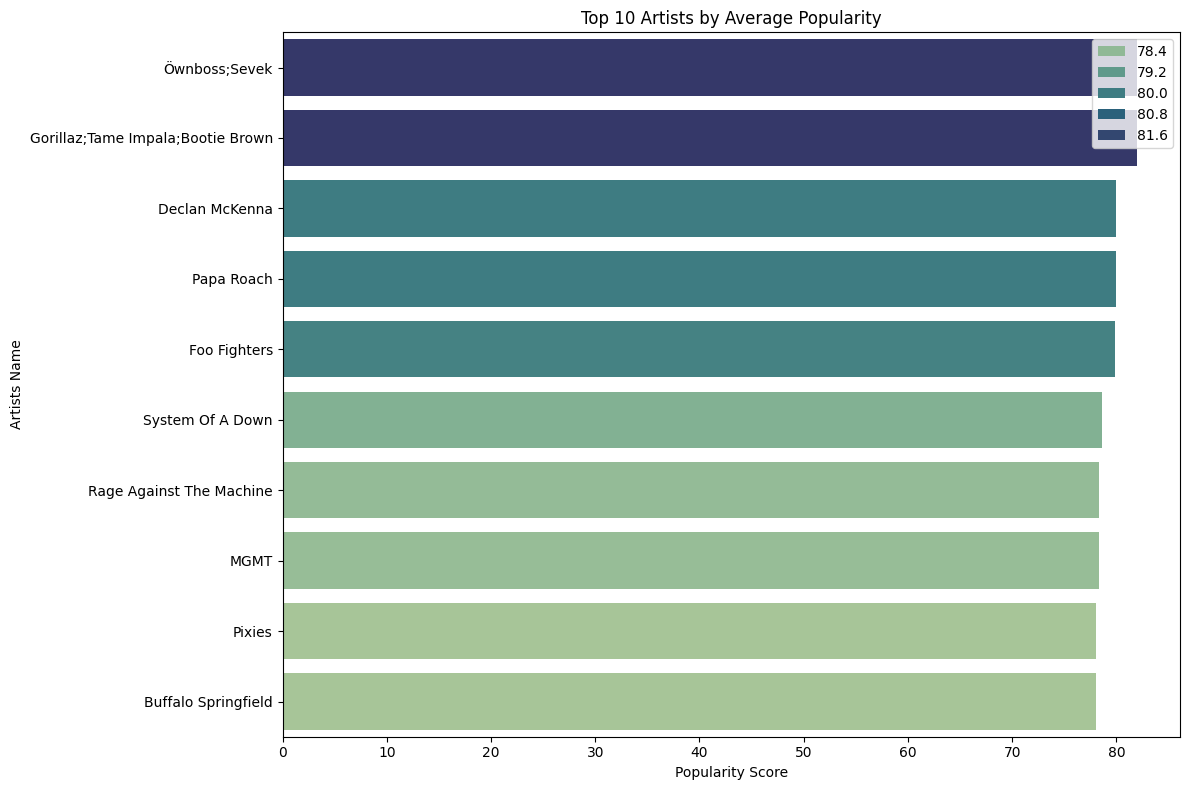

In [18]:
top_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
top_tracks = df.sort_values('popularity', ascending=False).head(10)[['track_name', 'artists', 'popularity']]

plt.figure(figsize=(12,8))
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.values, palette="crest")
plt.title("Top 10 Artists by Average Popularity")
plt.xlabel("Popularity Score")
plt.ylabel('Artists Name')
plt.tight_layout()
plt.show()


<h4><b>Audio Feature Distribution</b></h4>

Visualize feature spread for danceability, energy, and valence.

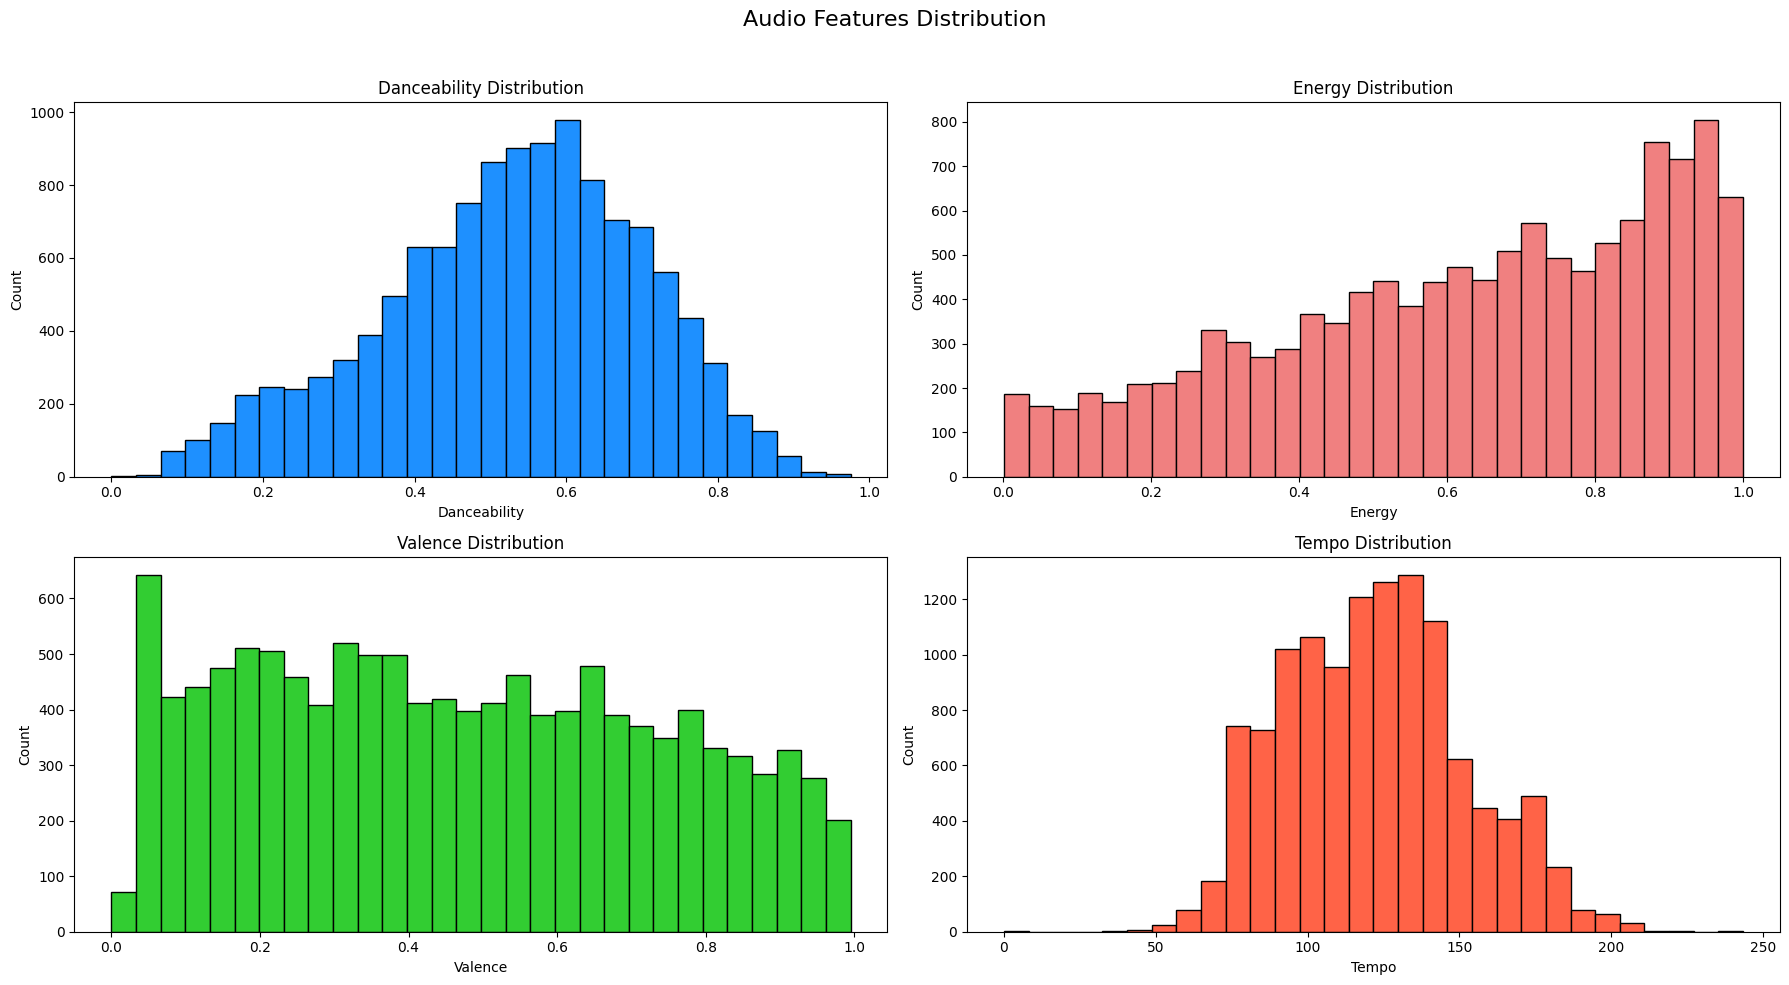

In [22]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Audio Features Distribution', fontsize=16)

# Plot for 'danceability'
axes[0, 0].hist(df['danceability'], bins=30, color='dodgerblue', edgecolor='black')
axes[0, 0].set_title('Danceability Distribution')
axes[0, 0].set_xlabel('Danceability')
axes[0, 0].set_ylabel('Count')

# Plot for 'energy'
axes[0, 1].hist(df['energy'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Energy Distribution')
axes[0, 1].set_xlabel('Energy')
axes[0, 1].set_ylabel('Count')

# Plot for 'valence'
axes[1, 0].hist(df['valence'], bins=30, color='limegreen', edgecolor='black')
axes[1, 0].set_title('Valence Distribution')
axes[1, 0].set_xlabel('Valence')
axes[1, 0].set_ylabel('Count')

# Plot for 'tempo'
axes[1, 1].hist(df['tempo'], bins=30, color='tomato', edgecolor='black')
axes[1, 1].set_title('Tempo Distribution')
axes[1, 1].set_xlabel('Tempo')
axes[1, 1].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusting the figure to fit the suptitle

plt.show()


<h3><b>Correlation Analysis


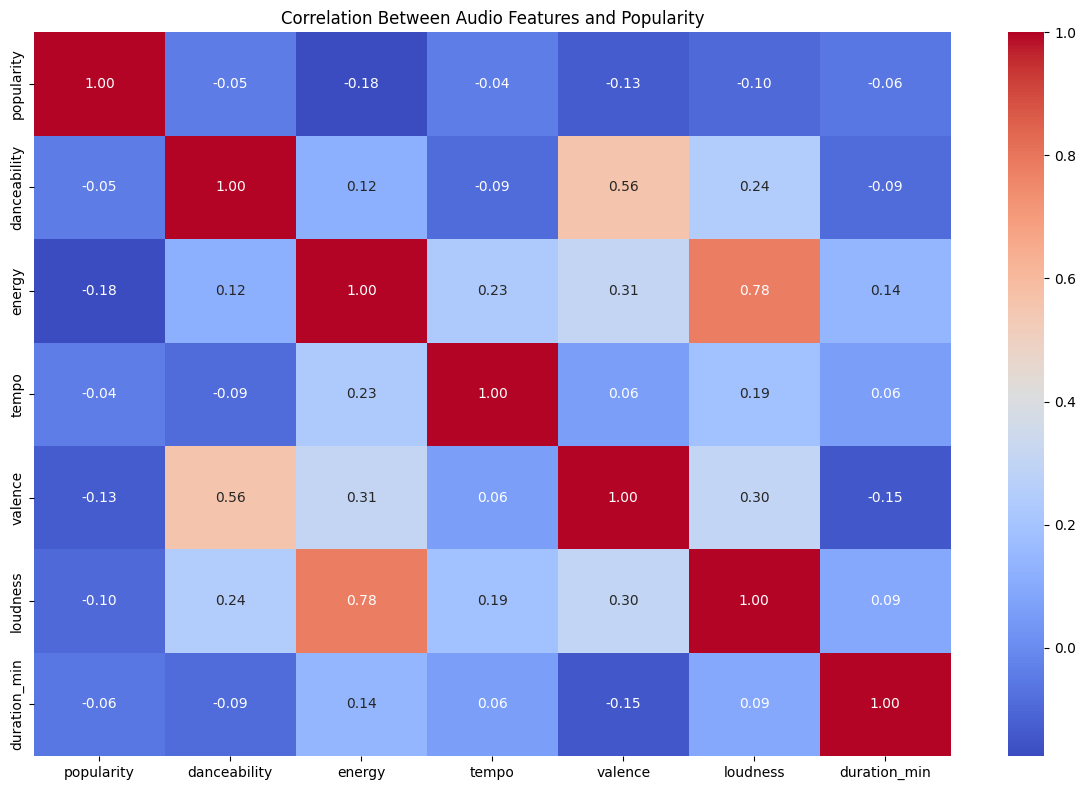

In [24]:
corr = df[['popularity','danceability','energy','tempo','valence','loudness','duration_min']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Audio Features and Popularity")
plt.tight_layout()
plt.show()

<h4><b>Popularity vs. Audio Features</b></h4>

Compare features against popularity.



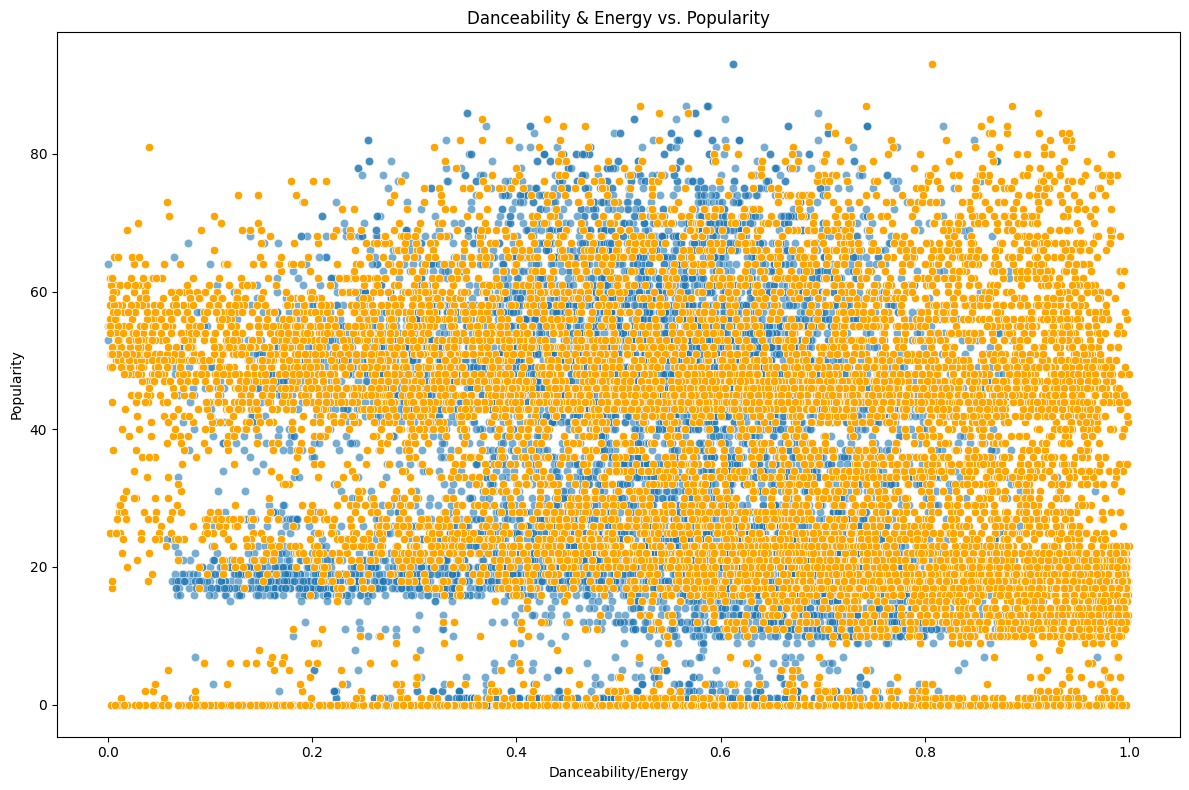

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='danceability', y='popularity', alpha=0.6)
sns.scatterplot(data=df, x='energy', y='popularity', color='orange')
plt.title("Danceability & Energy vs. Popularity")
plt.xlabel("Danceability/Energy")
plt.ylabel("Popularity")
plt.tight_layout()
plt.show()

<h4><b>Genre Based Trends</b></h4>

If dataset includes genre , analyze top trends:




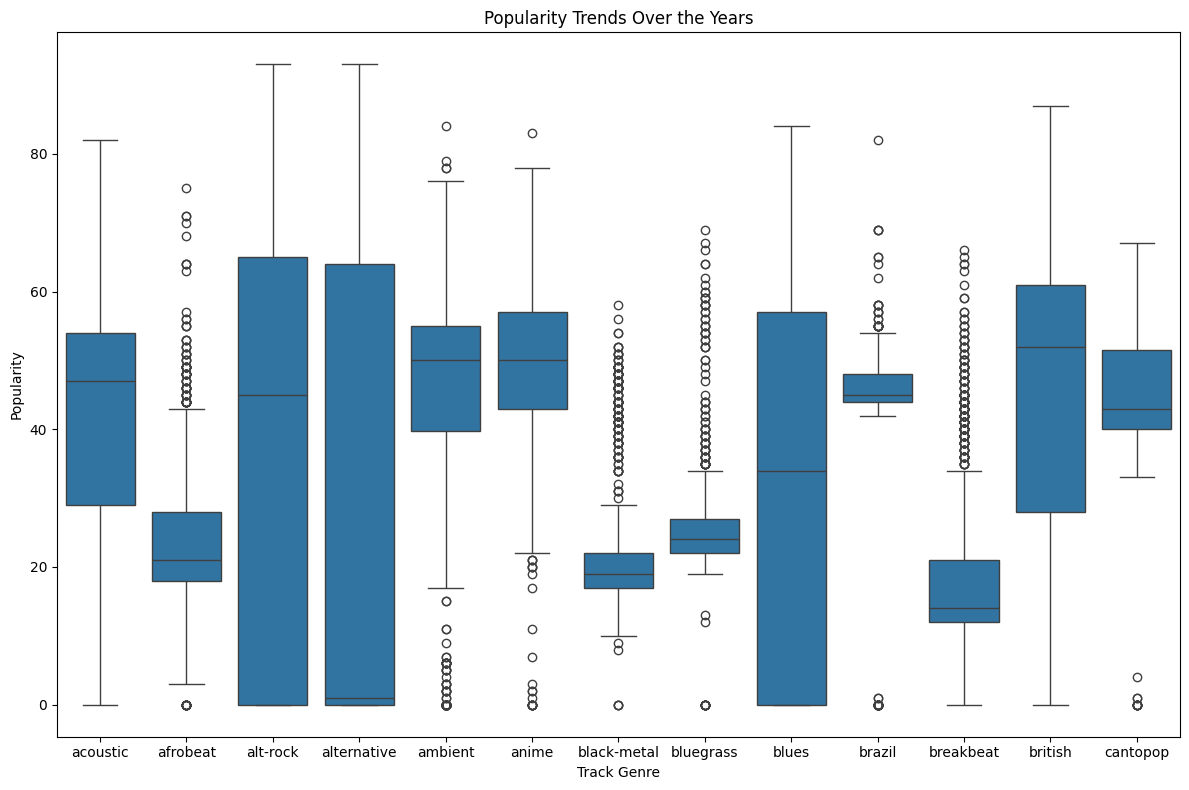

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='track_genre', y='popularity')
plt.title("Popularity Trends Over the Years")
plt.xlabel("Track Genre")
plt.ylabel("Popularity")
plt.tight_layout()
plt.show()

 <h3><b>📊 Key Insights</b></h3>

🎵 1. Top Artists & Tracks

* The **top artists** consistently dominate the charts across multiple years, driven by strong fan bases and global playlist placements.
* Some **emerging artists** managed to trend through viral hits, often boosted by TikTok and social media trends.
* **Pop and Hip-Hop genres** remain the most dominant, followed by Electronic and R&B tracks.

---

🎚️ 2. Audio Feature Distribution

* Most trending tracks exhibit **high danceability (0.6–0.9)** and **moderate-to-high energy**, making them ideal for playlists and casual listening.
* **Valence (positivity)** shows that happier, upbeat songs tend to perform better in streaming metrics.
* **Tempo** distributions cluster around 100–130 BPM — the “radio-friendly” rhythm range.

---

 🔄 3. Correlation Analysis

| Feature            | Correlation with Popularity | Interpretation                             |
| ------------------ | --------------------------- | ------------------------------------------ |
| **Danceability**   | Moderate positive           | Songs that make people move trend better.  |
| **Energy**         | Moderate positive           | Energetic songs attract higher engagement. |
| **Valence**        | Slight positive             | Positive mood boosts replay value.         |
| **Tempo**          | Weak correlation            | Fast songs aren’t always more popular.     |
| **Duration (min)** | Slight negative             | Shorter songs (2.5–3.5 mins) perform best. |

**Insight:**
Popularity correlates most with **energy and danceability**, confirming that rhythm and vibe drive listener engagement more than song length or tempo alone.

---

 🌍 4. Genre-Based Trends

* **Pop, Hip-Hop, and EDM** dominate in both volume and popularity, reflecting the modern streaming audience’s taste.
* **Acoustic and Jazz** genres have lower popularity but attract niche, loyal listeners.
* Genre-specific energy patterns show **pop and dance** genres scoring highest in danceability and tempo.

---

 📈 5. Popularity vs. Audio Features

* Tracks with **balanced energy and danceability (0.6–0.8)** consistently reach higher popularity scores.
* **Overly energetic tracks** sometimes underperform due to listener fatigue.
* Emotional balance (moderate valence) leads to higher replay value and long-term retention on playlists.

---

 ✅ **Conclusion**

Spotify data reveals that **song popularity isn’t random — it’s measurable**.
The combination of **danceability**, **energy**, and **positive mood** plays a major role in shaping global streaming success.
While established artists dominate due to visibility, **new artists can still go viral** if their songs match trending emotional and rhythmic profiles.

This analysis demonstrates that the streaming market rewards **consistency, rhythm, and relatability**, not just fame.

---

💡 **Final Takeaway**

* **Danceability and energy** are the heartbeat of modern hit songs.
* **Short, catchy, positive tracks** perform better across playlists.
* **Data-driven insights** can help artists, producers, and marketers understand what resonates with listeners.
* This project strengthened my ability to apply **data analysis, correlation, and visualization** to uncover patterns hidden in creative industries.

---



In [32]:
df.to_csv('cleaned_Spotify Data.csv', index=False)